In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.set_option('display.max_columns', None)


In [26]:
df = pd.read_csv("../data/raw/bayut_selling_properties.csv")
df.head()


,price,price_category,type,beds,baths,address,furnishing,completion_status,post_date,average_rent,building_name,year_of_completion,total_parking_spaces,total_floors,total_building_area_sqft,elevators,area_name,city,country,Latitude,Longitude,purpose
0,1450000,Medium,Apartment,1,2,"The Bay, Business Bay, Dubai",Furnished,Ready,2024-04-15,0,Unknown,0,0,0,0,0,Business Bay,Dubai,UAE,25.189427,55.264819,For Sale
1,6600000,High,Townhouse,5,5,"Brookfield, DAMAC Hills, Dubai",Unfurnished,Ready,2024-04-15,0,Unknown,0,0,0,0,0,DAMAC Hills,Dubai,UAE,25.028148,55.264246,For Sale
2,4825000,High,Apartment,2,3,"Vida Residence Downtown, Downtown Dubai, Dubai",Unfurnished,Ready,2024-04-18,288929,VIDA RESIDENCE DOWNTOWN,2018,510,56,1,11,Downtown Dubai,Dubai,UAE,25.186684,55.274705,For Sale
3,980000,Average,Apartment,3,3,"Building 39, Al Reef Downtown, Al Reef, Abu Dhabi",Unfurnished,Ready,2024-01-03,73384,Unknown,0,0,0,0,0,Al Reef,Abu Dhabi,UAE,24.466437,54.656891,For Sale
4,2499999,Medium,Townhouse,3,4,"Nima, The Valley, Dubai",Furnished,Off-Plan,2024-02-28,0,Unknown,0,0,0,0,0,The Valley,Dubai,UAE,25.019221,55.447201,For Sale


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41381 entries, 0 to 41380
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     41381 non-null  int64  
 1   price_category            41381 non-null  object 
 2   type                      41381 non-null  object 
 3   beds                      41381 non-null  int64  
 4   baths                     41381 non-null  int64  
 5   address                   41381 non-null  object 
 6   furnishing                41381 non-null  object 
 7   completion_status         41381 non-null  object 
 8   post_date                 41381 non-null  object 
 9   average_rent              41381 non-null  int64  
 10  building_name             41381 non-null  object 
 11  year_of_completion        41381 non-null  int64  
 12  total_parking_spaces      41381 non-null  int64  
 13  total_floors              41381 non-null  int64  
 14  total_

In [28]:
df.columns

Index(['price', 'price_category', 'type', 'beds', 'baths', 'address',
       'furnishing', 'completion_status', 'post_date', 'average_rent',
       'building_name', 'year_of_completion', 'total_parking_spaces',
       'total_floors', 'total_building_area_sqft', 'elevators', 'area_name',
       'city', 'country', 'Latitude', 'Longitude', 'purpose'],
      dtype='object')

In [29]:
df.describe()

,price,beds,baths,average_rent,year_of_completion,total_parking_spaces,total_floors,total_building_area_sqft,elevators,Latitude,Longitude
count,4.138100e+04,41381.000000,41381.000000,4.138100e+04,41381.000000,41381.000000,41381.000000,41381.000000,41381.000000,41363.000000,41363.000000
mean,3.788624e+06,2.190957,3.007540,9.292880e+04,681.112491,172.559073,13.212126,142.931273,2.304463,25.037851,55.158407
std,8.482870e+06,1.567855,1.785553,2.503703e+05,953.886883,353.899074,20.298365,248.719849,4.440953,0.437348,0.513871
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,15.175847,43.351928
25%,1.100000e+06,1.000000,2.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,25.026710,55.135252
50%,2.000000e+06,2.000000,3.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,25.078641,55.245999
75%,3.600000e+06,3.000000,4.000000,1.243790e+05,2012.000000,198.000000,22.000000,211.000000,4.000000,25.189427,55.307913
max,4.825000e+08,11.000000,11.000000,2.807952e+07,2024.000000,2929.000000,89.000000,997.000000,42.000000,25.797689,56.361294


In [30]:
df.isnull().sum()


price                        0
price_category               0
type                         0
beds                         0
baths                        0
address                      0
furnishing                   0
completion_status            0
post_date                    0
average_rent                 0
building_name                0
year_of_completion           0
total_parking_spaces         0
total_floors                 0
total_building_area_sqft     0
elevators                    0
area_name                    0
city                         0
country                      0
Latitude                    18
Longitude                   18
purpose                      0
dtype: int64

In [31]:
df = df[['price', 'beds', 'baths', 'type', 'area_name', 'total_building_area_sqft']]
df.head()


,price,beds,baths,type,area_name,total_building_area_sqft
0,1450000,1,2,Apartment,Business Bay,0
1,6600000,5,5,Townhouse,DAMAC Hills,0
2,4825000,2,3,Apartment,Downtown Dubai,1
3,980000,3,3,Apartment,Al Reef,0
4,2499999,3,4,Townhouse,The Valley,0


In [32]:
df = df.rename(columns={
    'beds': 'bedrooms',
    'baths': 'bathrooms',
    'type': 'property_type',
    'area_name': 'location',
    'total_building_area_sqft': 'area_sqft'
})

df.head()


,price,bedrooms,bathrooms,property_type,location,area_sqft
0,1450000,1,2,Apartment,Business Bay,0
1,6600000,5,5,Townhouse,DAMAC Hills,0
2,4825000,2,3,Apartment,Downtown Dubai,1
3,980000,3,3,Apartment,Al Reef,0
4,2499999,3,4,Townhouse,The Valley,0


In [33]:
df.isnull().sum()


price            0
bedrooms         0
bathrooms        0
property_type    0
location         0
area_sqft        0
dtype: int64

In [34]:
df = df.dropna()


In [35]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['area_sqft'] = pd.to_numeric(df['area_sqft'], errors='coerce')

df = df.dropna()



In [36]:
df = df[df['price'] > 0]
df = df[df['area_sqft'] > 0]

# remove extreme outliers
df = df[df['price'] < df['price'].quantile(0.99)]
df = df[df['area_sqft'] < df['area_sqft'].quantile(0.99)]


In [37]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 17405 entries, 2 to 41380
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          17405 non-null  int64 
 1   bedrooms       17405 non-null  int64 
 2   bathrooms      17405 non-null  int64 
 3   property_type  17405 non-null  object
 4   location       17405 non-null  object
 5   area_sqft      17405 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 951.8+ KB


,price,bedrooms,bathrooms,area_sqft
count,1.740500e+04,17405.000000,17405.000000,17405.000000
mean,2.660367e+06,1.447917,2.135995,327.202758
std,2.704296e+06,0.968655,1.046195,278.116766
min,2.500000e+05,0.000000,1.000000,1.000000
25%,1.050000e+06,1.000000,1.000000,90.000000
50%,1.800000e+06,1.000000,2.000000,276.000000
75%,3.200000e+06,2.000000,3.000000,530.000000
max,2.390000e+07,10.000000,10.000000,960.000000


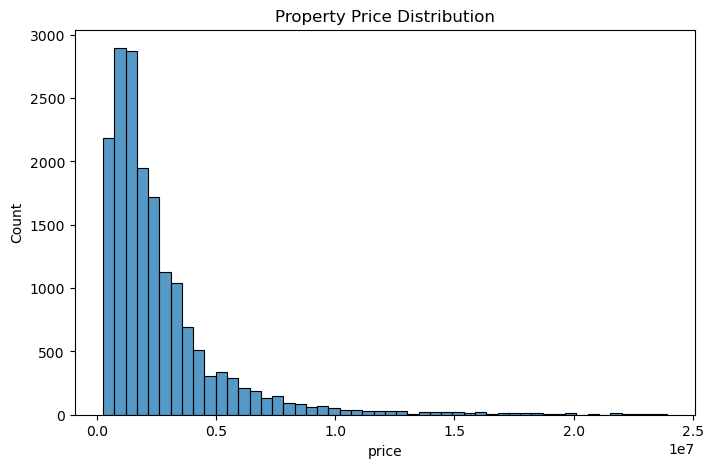

In [38]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50)
plt.title("Property Price Distribution")
plt.show()


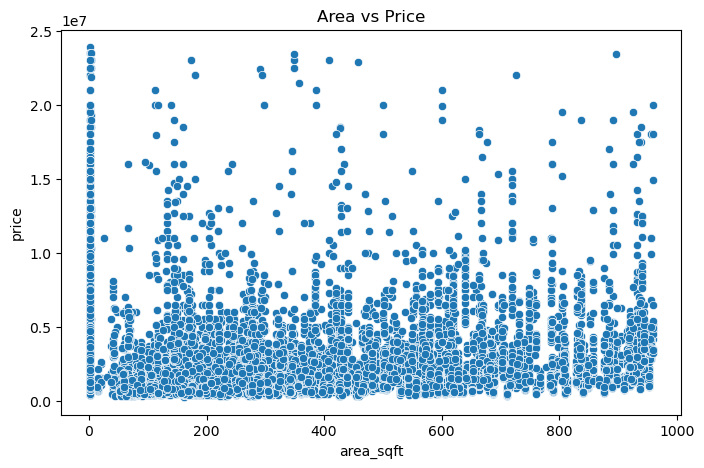

In [39]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='area_sqft', y='price', data=df)
plt.title("Area vs Price")
plt.show()


In [40]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17405 entries, 2 to 41380
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          17405 non-null  int64 
 1   bedrooms       17405 non-null  int64 
 2   bathrooms      17405 non-null  int64 
 3   property_type  17405 non-null  object
 4   location       17405 non-null  object
 5   area_sqft      17405 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 951.8+ KB


In [41]:
X = df[['bedrooms', 'bathrooms', 'area_sqft', 'property_type', 'location']]
y = df['price']


In [42]:
X = pd.get_dummies(X, drop_first=True)
X.head()


,bedrooms,bathrooms,area_sqft,property_type_Hotel Apartment,property_type_Penthouse,property_type_Residential Building,property_type_Residential Floor,property_type_Residential Plot,location_Al Barsha,location_Al Furjan,location_Al Jaddaf,location_Al Quoz,location_Al Qusais,location_Al Sufouh,location_Al Wasl,location_Arjan,location_Barsha Heights (Tecom),location_Bluewaters Island,location_Bur Dubai,location_Business Bay,location_Culture Village,location_DAMAC Hills,location_DAMAC Hills 2 (Akoya by DAMAC),location_Deira,location_Discovery Gardens,location_Downtown Dubai,location_Dubai Creek Harbour,location_Dubai Design District,location_Dubai Festival City,location_Dubai Harbour,location_Dubai Hills Estate,location_Dubai Industrial City,location_Dubai Internet City,location_Dubai Investment Park (DIP),location_Dubai Marina,location_Dubai Maritime City,location_Dubai Media City,location_Dubai Production City (IMPZ),location_Dubai Residence Complex,location_Dubai Science Park,location_Dubai Silicon Oasis (DSO),location_Dubai South,location_Dubai Sports City,location_Dubai Studio City,location_Dubai Waterfront,location_Dubailand,location_Expo City,location_Green Community,location_International City,location_Jebel Ali,location_Jumeirah,location_Jumeirah Beach Residence (JBR),location_Jumeirah Golf Estates,location_Jumeirah Heights,location_Jumeirah Lake Towers (JLT),location_Jumeirah Village Circle (JVC),location_Jumeirah Village Triangle (JVT),location_Living Legends,location_Liwan,location_Majan,location_Meydan City,location_Mina Rashid,location_Mirdif,location_Mohammed Bin Rashid City,location_Motor City,location_Mudon,location_Muhaisnah,location_Palm Jumeirah,location_Pearl Jumeirah,location_Remraam,location_Sobha Hartland,location_The Greens,location_The Hills,location_The Views,location_Town Square,location_Umm Suqeim,location_Wasl Gate,location_World Trade Centre,location_Za'abeel
2,2,3,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,0,1,502,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,1,2,696,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,1,2,810,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,1,2,571,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression Results")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Results
MAE: 954395.7102455152
R2 Score: 0.6171944745254622


In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Results")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Results
MAE: 456522.05476010795
R2 Score: 0.8180542047040202


In [46]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_rf)
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf)
    ]
})

results


,Model,MAE,R2 Score
0,Linear Regression,954395.710246,0.617194
1,Random Forest,456522.054760,0.818054


In [47]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)


bedrooms                                   0.503932
area_sqft                                  0.204156
location_Palm Jumeirah                     0.037425
location_Downtown Dubai                    0.029608
location_Dubai Harbour                     0.028388
location_Bluewaters Island                 0.027794
bathrooms                                  0.026097
location_Jumeirah Beach Residence (JBR)    0.024932
property_type_Penthouse                    0.021869
location_Business Bay                      0.010801
dtype: float64

In [48]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# Train final model on full dataset
rf_final = RandomForestRegressor(n_estimators=100, random_state=42)
rf_final.fit(X, y)

# Save model
joblib.dump(rf_final, "../model.pkl")

# Save feature columns (very important)
joblib.dump(X.columns, "../model_columns.pkl")

print("Model saved successfully")


Model saved successfully


In [49]:
df.to_csv("../data/processed/cleaned_properties.csv", index=False)


Key Insights from the Model

1) Bedroom count is the strongest price driver

Bedrooms contributed ~50% of the model’s decision weight.
This shows that property size and capacity strongly influence price.

Business implication:
Developers and investors should prioritize larger units in premium areas for higher returns.

2) Property area is the second most important factor

Area (sqft) contributes ~20% to price prediction.
Larger properties command significantly higher prices.

Business implication:
Price per square foot is a critical metric for valuation and investment decisions.

3) Premium waterfront locations dominate price influence

Top high-impact locations:
Location	Importance
Palm Jumeirah	3.7%
Downtown Dubai	3.0%
Dubai Harbour	2.8%
Bluewaters Island	2.7%
JBR	2.5%

These are luxury waterfront or central business districts.

Business implication:
Properties in iconic locations carry strong price premiums regardless of size.

4) Bathrooms also affect pricing

Bathrooms contributed ~2.6% to the model.
Indicates buyers value comfort and convenience features.

5) Luxury property types carry significant premiums

Penthouses alone contributed ~2.2% importance.
Suggests a strong demand for high-end property types.

Business implication:
Luxury segments generate disproportionately higher property values.